In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
covid_mit = pd.read_csv('latest_Europe_Central_Asia.csv')

In [3]:
covid_mit.head()

,countryname,countrycode,region,date,policytype,policyvalue,flag,new_level,prev_level,notes
0,Albania,ALB,Europe_Central_Asia,20200828.0,C1: School closing,3.0,1,3G,2G,'Pre-university schools will re-open on Septem...
1,Albania,ALB,Europe_Central_Asia,20200828.0,C3: Cancel public events,2.0,1,2G,2G,Large gatherings continue to be banned and cin...
2,Albania,ALB,Europe_Central_Asia,20200828.0,C4: Restrictions on gatherings,4.0,1,4G,4G,Large gatherings continue to be banned and cin...
3,Albania,ALB,Europe_Central_Asia,20200828.0,C8: International travel controls,1.0,.,1.,2.,'There are no quarantine requirements for inco...
4,Albania,ALB,Europe_Central_Asia,20200907.0,C2: Workplace closing,2.0,1,2G,2G,"Following an uptick in cases, Albanian authori..."


In [4]:
covid_mit['countryname'].describe()

count            573
unique            48
top       Azerbaijan
freq              32
Name: countryname, dtype: object

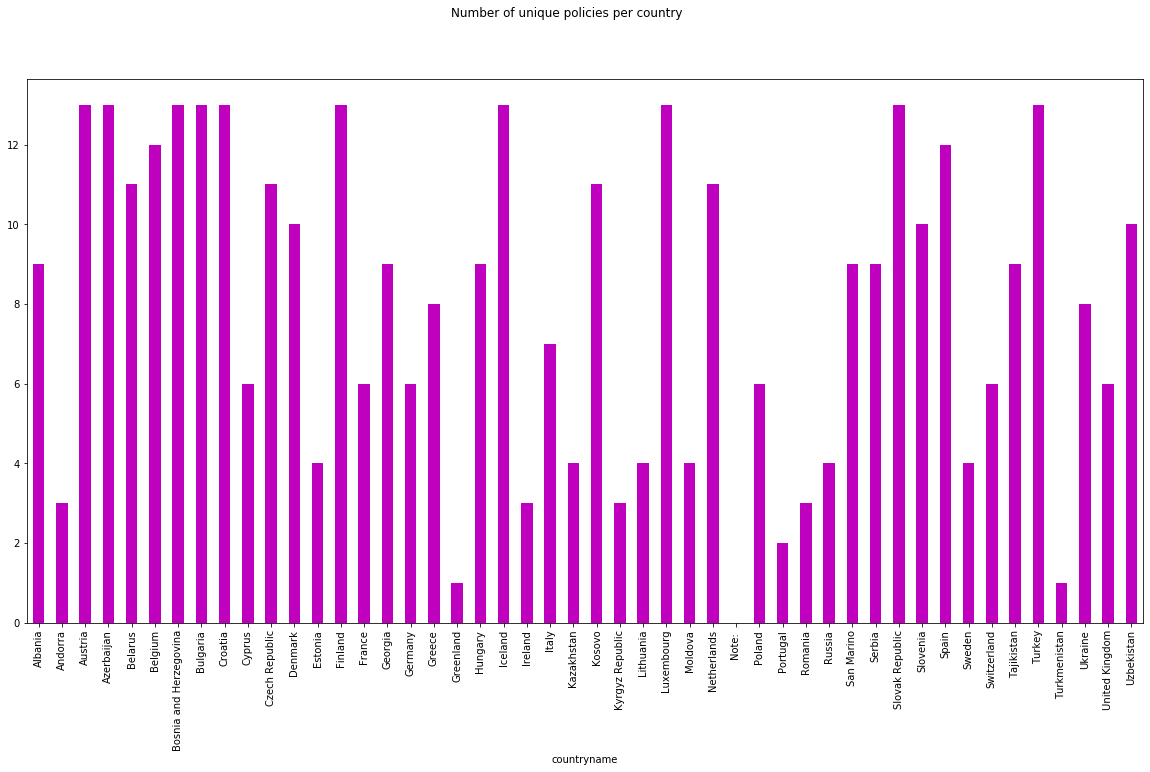

In [5]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Number of unique policies per country')
covid_mit.groupby('countryname')['policytype'].nunique().plot(kind='bar', color='m')

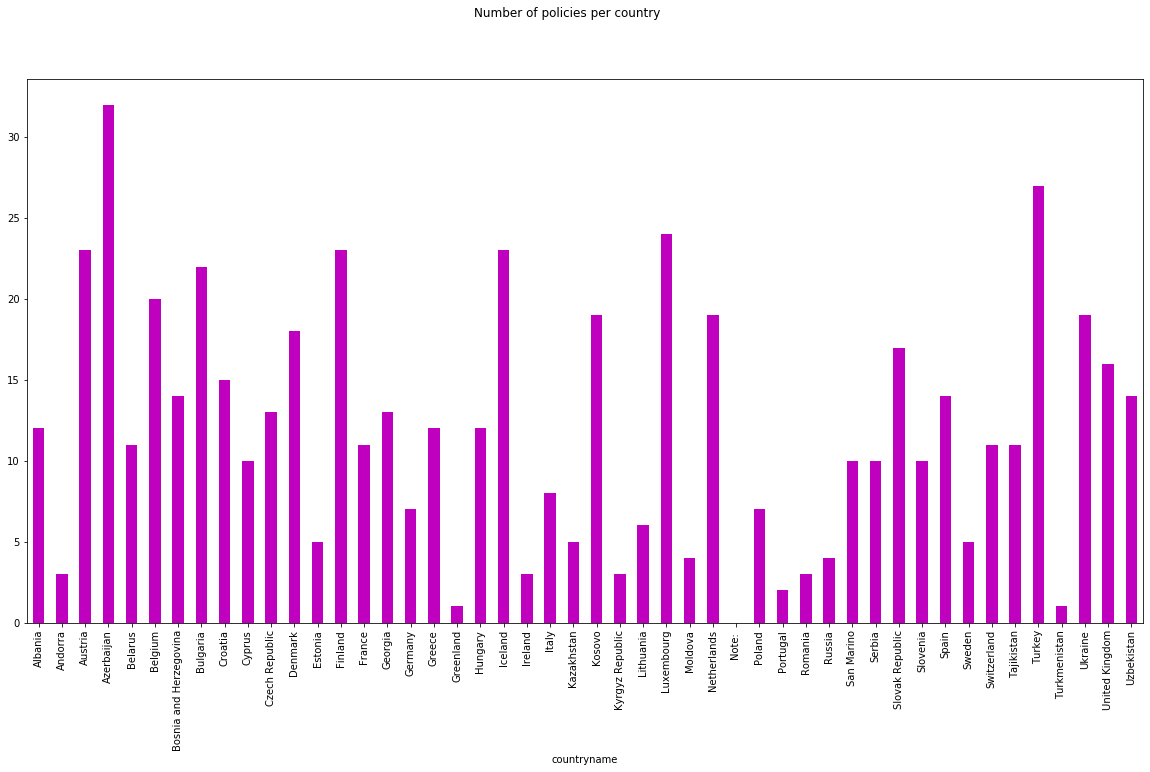

In [6]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Number of policies per country')
covid_mit.groupby('countryname')['policytype'].count().plot(kind='bar', color='m')

In [7]:
covid_mit.groupby('policytype')['countryname'].nunique()

policytype
C1: School closing                       41
C2: Workplace closing                    36
C3: Cancel public events                 33
C4: Restrictions on gatherings           42
C5: Close public transport               25
C6: Stay at home requirements            26
C7: Restrictions on internal movement    33
C8: International travel controls        39
E1: Income support                       26
E2: Debt/contract relief                 25
H1: Public information campaigns         17
H2: Testing policy                       22
H3: Contact tracing                      16
Name: countryname, dtype: int64

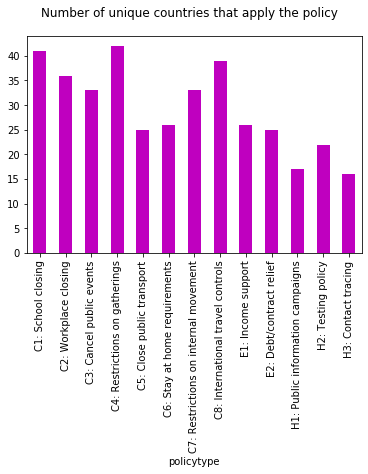

In [8]:
fig = plt.figure()
fig.suptitle('Number of unique countries that apply the policy')
covid_mit.groupby('policytype')['countryname'].nunique().plot(kind='bar', color='m')

In [10]:
covid_mit.groupby('countryname')['policytype'].nunique()

countryname
Albania                    9
Andorra                    3
Austria                   13
Azerbaijan                13
Belarus                   11
Belgium                   12
Bosnia and Herzegovina    13
Bulgaria                  13
Croatia                   13
Cyprus                     6
Czech Republic            11
Denmark                   10
Estonia                    4
Finland                   13
France                     6
Georgia                    9
Germany                    6
Greece                     8
Greenland                  1
Hungary                    9
Iceland                   13
Ireland                    3
Italy                      7
Kazakhstan                 4
Kosovo                    11
Kyrgyz Republic            3
Lithuania                  4
Luxembourg                13
Moldova                    4
Netherlands               11
Note:                      0
Poland                     6
Portugal                   2
Romania                    3
Ru

In [14]:
df = covid_mit.groupby('countryname')['policytype'].nunique().reset_index()
df['uniq_policy'] = df['policytype']
df = df.drop(['policytype'], axis=1)

In [15]:
df

,countryname,uniq_policy
0,Albania,9
1,Andorra,3
2,Austria,13
3,Azerbaijan,13
4,Belarus,11
5,Belgium,12
6,Bosnia and Herzegovina,13
7,Bulgaria,13
8,Croatia,13
9,Cyprus,6


In [18]:
fig = px.choropleth(df,
                    locations="countryname", 
                    color='uniq_policy',
                    locationmode = 'country names')
fig.update_layout(
    title_text = 'Number of unique policies per country',
    geo_scope='europe',
)
fig.show()